In [36]:
import httplib, urllib, base64, json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

faceApiSubscriptionKey = "2e51b48e8c2c4dc28a5dad3e8dc52908"

baseFaceUrl = "https://raw.githubusercontent.com/deldersveld/\
CortanaAnalyticsLabs/master/PerceptualIntelligence/Images/"

thumbsUp = baseFaceUrl + "ThumbsUp.png"
multipleFaces = baseFaceUrl + "MultipleFaces.png"
faceA = baseFaceUrl + "FaceA.png"
faceB = baseFaceUrl + "FaceB.png"
faceC = baseFaceUrl + "FaceC.png"
faceD = baseFaceUrl + "FaceD.png"
faceE = baseFaceUrl + "FaceE.png"

In [25]:
def detect(apiKey, imageUrl):
    jsonBody = '{"url":"' + imageUrl + '"}'

    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender',
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/detect?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
    return data

def createFaceList(apiKey, faceListId):
    faceList = faceListId
    jsonBody = '{"name":"' + faceList + '", "userData":"User-provided data attached to the face list"}'
    
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("PUT", "/face/v1.0/facelists/" + faceList + "?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def getFaceList(apiKey, faceListId):
    faceList = faceListId
    jsonBody = ''
    
    headers = {
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("GET", "/face/v1.0/facelists/" + faceList + "?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def deleteFaceList(apiKey, faceListId):
    faceList = faceListId
    jsonBody = ''
    
    headers = {
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("DELETE", "/face/v1.0/facelists/" + faceList + "%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def addFaceToFaceList(apiKey, faceListId, imageUrl):
    faceList = faceListId
    jsonBody = '{"url":"' + imageUrl + '"}'
    
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/facelists/" + faceList + "/persistedFaces?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
def findSimilars(apiKey, faceListId, faceId, numberOfCandidates):
    jsonBody = '{"faceId":"' + faceId + '", \
                "faceListId":"' + faceListId + '", \
                "maxNumOfCandidatesReturned":' + numberOfCandidates + '}'
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': apiKey,
    }

    params = urllib.urlencode({
    })

    try:
        conn = httplib.HTTPSConnection('api.projectoxford.ai')
        conn.request("POST", "/face/v1.0/findsimilars?%s" % params, jsonBody, headers)
        response = conn.getresponse()
        data = response.read()
        print(data)
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        
print("API functions created")

API functions created


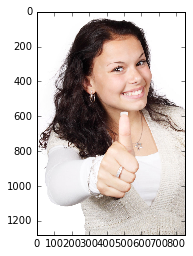

In [3]:
img = mpimg.imread(thumbsUp)
plt.imshow(img)

In [6]:
thumbsUpData = detect(faceApiSubscriptionKey, thumbsUp)

[{"faceId":"7af21739-a444-46e0-b5c4-b8eb38705536","faceRectangle":{"top":231,"left":391,"width":304,"height":304},"faceAttributes":{"gender":"female","age":31.6}}]


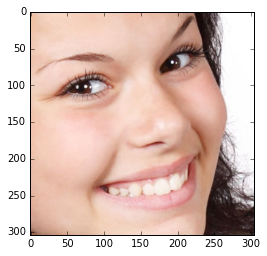

In [7]:
face = json.loads(thumbsUpData)
thumbsUpFaceId = face[0]["faceId"]
faceTop = face[0]["faceRectangle"]["top"]
faceLeft = face[0]["faceRectangle"]["left"]
faceWidth = face[0]["faceRectangle"]["width"]
faceHeight = face[0]["faceRectangle"]["height"]

img = mpimg.imread(thumbsUp)
plt.imshow(img[faceTop:faceTop + faceHeight, faceLeft:faceLeft + faceWidth])

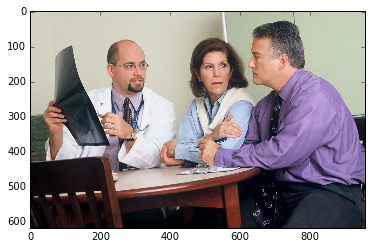

In [37]:
img = mpimg.imread(multipleFaces)
plt.imshow(img)

In [38]:
multipleFacesData = detect(faceApiSubscriptionKey, multipleFaces)

[{"faceId":"7163883d-2fff-4592-a23d-a5601706e50d","faceRectangle":{"top":133,"left":485,"width":97,"height":97},"faceAttributes":{"gender":"female","age":49.3}},{"faceId":"3812d703-085e-49b3-83e0-6caa62b2ca33","faceRectangle":{"top":135,"left":263,"width":86,"height":86},"faceAttributes":{"gender":"male","age":41.9}}]


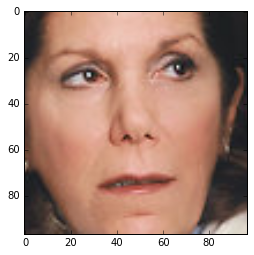

In [39]:
face = json.loads(multipleFacesData)
faceTop = face[0]["faceRectangle"]["top"]
faceLeft = face[0]["faceRectangle"]["left"]
faceWidth = face[0]["faceRectangle"]["width"]
faceHeight = face[0]["faceRectangle"]["height"]

img = mpimg.imread(multipleFaces)
plt.imshow(img[faceTop:faceTop + faceHeight, faceLeft:faceLeft + faceWidth])

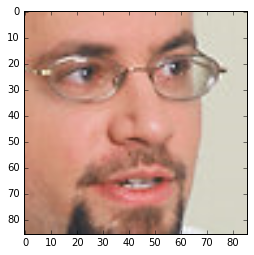

In [40]:
face = json.loads(multipleFacesData)
faceTop = face[1]["faceRectangle"]["top"]
faceLeft = face[1]["faceRectangle"]["left"]
faceWidth = face[1]["faceRectangle"]["width"]
faceHeight = face[1]["faceRectangle"]["height"]

img = mpimg.imread(multipleFaces)
plt.imshow(img[faceTop:faceTop + faceHeight, faceLeft:faceLeft + faceWidth])

In [28]:
#deleteFaceList(faceApiSubscriptionKey, "sample")
createFaceList(faceApiSubscriptionKey, "sample")
getFaceList(faceApiSubscriptionKey, "sample")


{"persistedFaces":[],"faceListId":"sample","name":"sample","userData":"User-provided data attached to the face list"}


[{"faceId":"0fc05c94-0dce-49fd-9afe-786a01fb73a8","faceRectangle":{"top":252,"left":509,"width":345,"height":345},"faceAttributes":{"gender":"female","age":23.4}}]
{"persistedFaceId":"9a19f1f6-8b34-448a-b13b-47359b685121"}


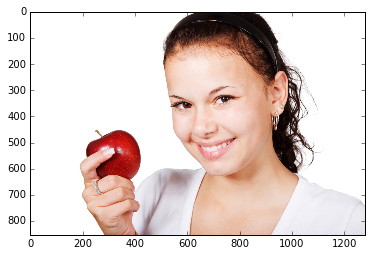

In [29]:
img = mpimg.imread(faceA)
plt.imshow(img)
rawFaceDataA = detect(faceApiSubscriptionKey, faceA)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceA)

[{"faceId":"74d87661-0dae-477e-a8e0-11be02c0cc2b","faceRectangle":{"top":208,"left":247,"width":295,"height":295},"faceAttributes":{"gender":"female","age":32.0}}]
{"persistedFaceId":"c26a79fe-8d20-4ddc-be0e-43649b2e6d06"}


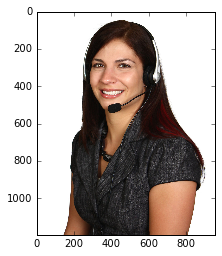

In [30]:
img = mpimg.imread(faceB)
plt.imshow(img)
rawFaceDataB = detect(faceApiSubscriptionKey, faceB)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceB)

[{"faceId":"302c2557-3f37-4d76-a0f0-23c32410f16d","faceRectangle":{"top":296,"left":389,"width":183,"height":183},"faceAttributes":{"gender":"male","age":39.1}}]
{"persistedFaceId":"ca00bc29-9abe-4409-a36d-52f501a13f0a"}


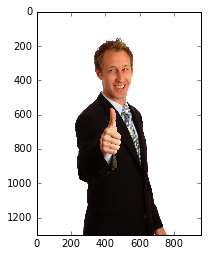

In [31]:
img = mpimg.imread(faceC)
plt.imshow(img)
rawFaceDataC = detect(faceApiSubscriptionKey, faceC)
faceDataC = json.loads(rawFaceDataC)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceC)

[{"faceId":"2faa1383-bc1a-4461-8c1b-24e1b46706b6","faceRectangle":{"top":84,"left":309,"width":79,"height":79},"faceAttributes":{"gender":"male","age":24.6}}]
{"persistedFaceId":"6dd6dfda-da86-4f97-8f3c-4e2715211b69"}


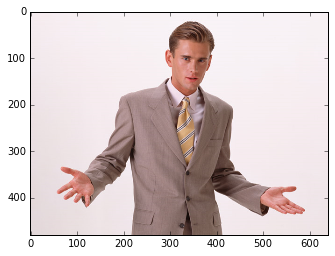

In [32]:
img = mpimg.imread(faceD)
plt.imshow(img)
rawFaceDataD = detect(faceApiSubscriptionKey, faceD)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceD)

[{"faceId":"60c61377-f1fc-48bc-be29-8cf1b1cbbda6","faceRectangle":{"top":75,"left":162,"width":100,"height":100},"faceAttributes":{"gender":"female","age":26.6}}]
{"persistedFaceId":"ae034d00-82a3-4848-92b4-e34b98248f57"}


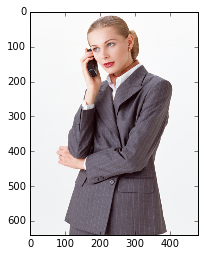

In [33]:
img = mpimg.imread(faceE)
plt.imshow(img)
rawFaceDataE = detect(faceApiSubscriptionKey, faceE)
addFaceToFaceList(faceApiSubscriptionKey, "sample", faceE)

In [34]:
getFaceList(faceApiSubscriptionKey, "sample")

{"persistedFaces":[{"persistedFaceId":"9a19f1f6-8b34-448a-b13b-47359b685121","userData":null},{"persistedFaceId":"c26a79fe-8d20-4ddc-be0e-43649b2e6d06","userData":null},{"persistedFaceId":"ca00bc29-9abe-4409-a36d-52f501a13f0a","userData":null},{"persistedFaceId":"6dd6dfda-da86-4f97-8f3c-4e2715211b69","userData":null},{"persistedFaceId":"ae034d00-82a3-4848-92b4-e34b98248f57","userData":null}],"faceListId":"sample","name":"sample","userData":"User-provided data attached to the face list"}


In [35]:
findSimilars(faceApiSubscriptionKey, "sample", thumbsUpFaceId, "5")

[{"persistedFaceId":"9a19f1f6-8b34-448a-b13b-47359b685121","confidence":0.775705636}]
